## Paquetes necesarios

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

## Cargar el paquete Yahoo Finance

In [4]:
!pip install yfinance

In [6]:
def preprocessing_yf(symbol):
  
  #Importar los datos
  df = yf.download(symbol).dropna()

  #Renombrar
  df.columns = ["open", "high", "low", "close", "adj close", "volume"]
  df.index.name = "time"

  # Eliminar la columna adj close
  del df["adj close"]

  return df

In [8]:
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

### Descarga la serie de tiempo de la accción de Amazon

In [11]:
df = preprocessing_yf("AMZN")

[*********************100%***********************]  1 of 1 completed


In [13]:
df=df.asfreq('b') #bussiness day
df=df.fillna(method='ffill')

In [15]:
df.head()

,open,high,low,close,volume
time,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,1.443120e+09
1997-05-16,0.098438,0.098958,0.085417,0.086458,2.940000e+08
1997-05-19,0.088021,0.088542,0.081250,0.085417,1.221360e+08
1997-05-20,0.086458,0.087500,0.081771,0.081771,1.093440e+08
1997-05-21,0.081771,0.082292,0.068750,0.071354,3.770640e+08


In [17]:
df.tail()

,open,high,low,close,volume
time,,,,,
2024-10-14,189.779999,189.830002,187.360001,187.539993,22614400.0
2024-10-15,187.630005,188.410004,184.580002,187.690002,32178900.0
2024-10-16,187.050003,187.779999,185.610001,186.889999,23456800.0
2024-10-17,188.220001,188.940002,186.000000,187.529999,25039400.0
2024-10-18,187.149994,190.740005,186.279999,188.990005,37379700.0


In [19]:
df.describe()

,open,high,low,close,volume
count,7157.000000,7157.000000,7157.000000,7157.000000,7.157000e+03
mean,38.515777,38.965657,38.026785,38.507957,1.361979e+08
std,55.049726,55.665339,54.369027,55.025942,1.367965e+08
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06
25%,2.082500,2.131000,2.050000,2.087500,6.368600e+07
50%,8.833000,8.924500,8.714000,8.838500,1.007760e+08
75%,58.599998,58.916000,58.035000,58.445999,1.555960e+08
max,200.089996,201.199997,199.050003,200.000000,2.086584e+09


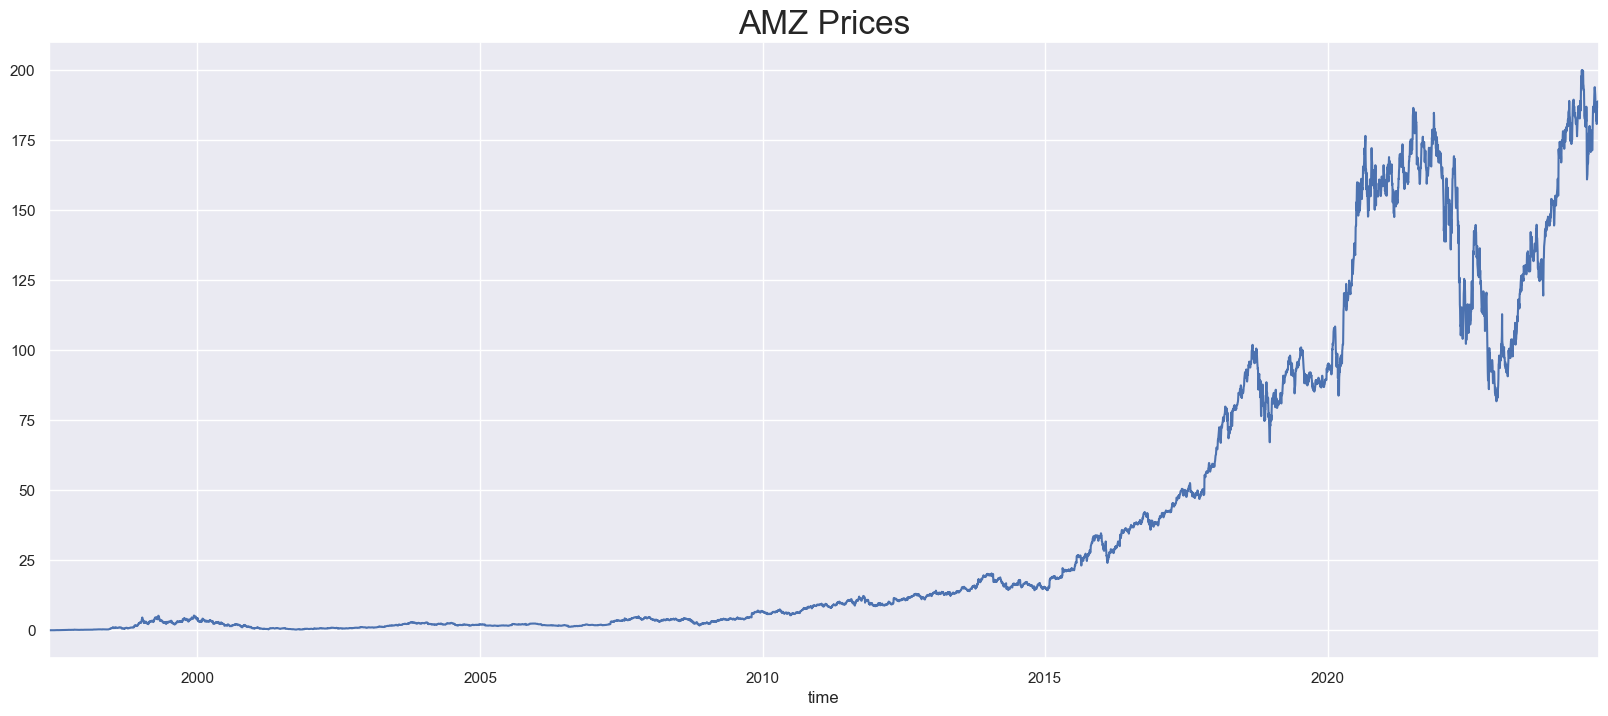

In [21]:
df.close.plot(figsize=(20,8))
plt.title("AMZ Prices", size = 24)
#plt.ylim(0,2300)
plt.show()

<Axes: xlabel='time'>

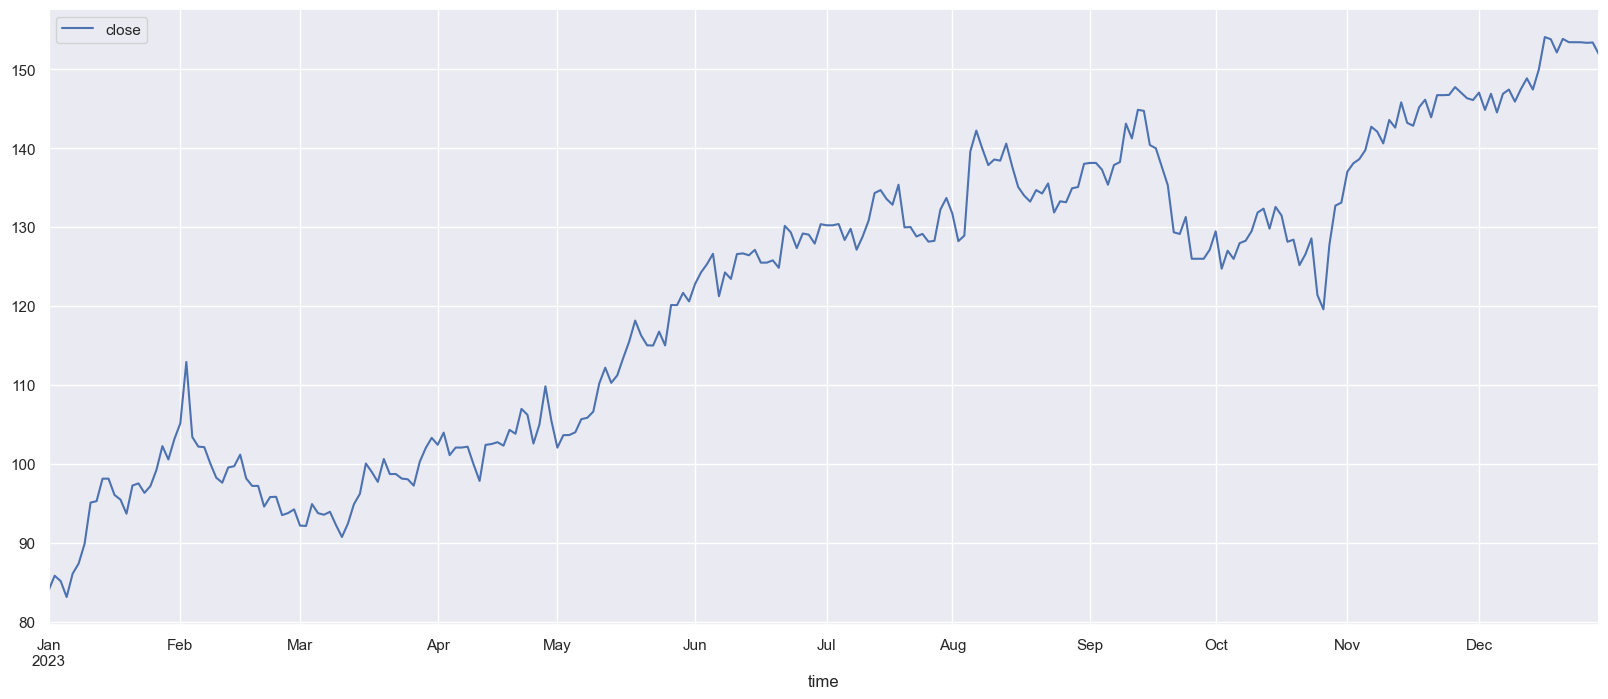

In [23]:
df[["close"]].loc["2023"].plot(figsize=(20,8))

## Prueba de estacionalidad de la serie de tiempo

Se calcula un estadístico de prueba ($\lambda_0$), que también se llama estadístico de constraste.

Este estadístico de prueba se compara con un valor crítico de la prueva ($\lambda_{critico}$).

Si $(\lambda_0 < \lambda_{critico})$ se rechaza $H_0$. Por tanto, la serie es estacionaria.

Otra forma es calculando el $p_{valor}$ con el cual se obtiene evidencia a favor de la hipótesis nula.

Si el $p_{valor}$ es cercano a cero, la probabilidad de aceptar la hipótesis nula es pequeña.

$\alpha =$ nivel de significancia.

$1 - \alpha =$ nivel de confianza.

$H_0: $ La series no es estacionaria.

Si $p_{valor} < \alpha $ se rechaza $H_0$. Por tanto, la serie es estacionaria.

In [27]:
sts.adfuller(df.close)

(1.1637150167781993,
 0.995725345566647,
 29,
 7127,
 {'1%': -3.4312678696271246,
  '5%': -2.86194562577061,
  '10%': -2.5669859105002075},
 24466.256730944857)

(1.1637150167781993, $\xleftarrow[]{} \lambda_0 $

 0.995725345566647, $\xleftarrow[]{} p_{valor}$

29, $\xleftarrow[]{} $ Período de tiempo en el que existe autocorrelación.

7127, $\xleftarrow[]{} $ Cantidad de datos de la serie de tiempos.

{'1%': -3.4312678696271246,
  '5%': -2.86194562577061,
  '10%': -2.5669859105002075}, $\xleftarrow[]{} $ Valores críticos para cada nivel de significancia.

24466.256730944857) $\xleftarrow[]{} $ El criterio de información maximizado.

Para un nivel de confianza del 95%, la serie no es estacionaria

$1.1637150167781993  = \lambda_0 > -2.86194562577061 = \lambda_{critico}$

La $H_0: $ no debe ser rechazada.

La serie NO es estacionaria

In [39]:
sts.adfuller(df[["close"]].loc["2023"])

(-1.1633548962789848,
 0.6891576204336299,
 2,
 257,
 {'1%': -3.4560535712549925,
  '5%': -2.8728527662442334,
  '10%': -2.5727985212493754},
 1118.6765775905042)

## Descomposición de la serie en componentes

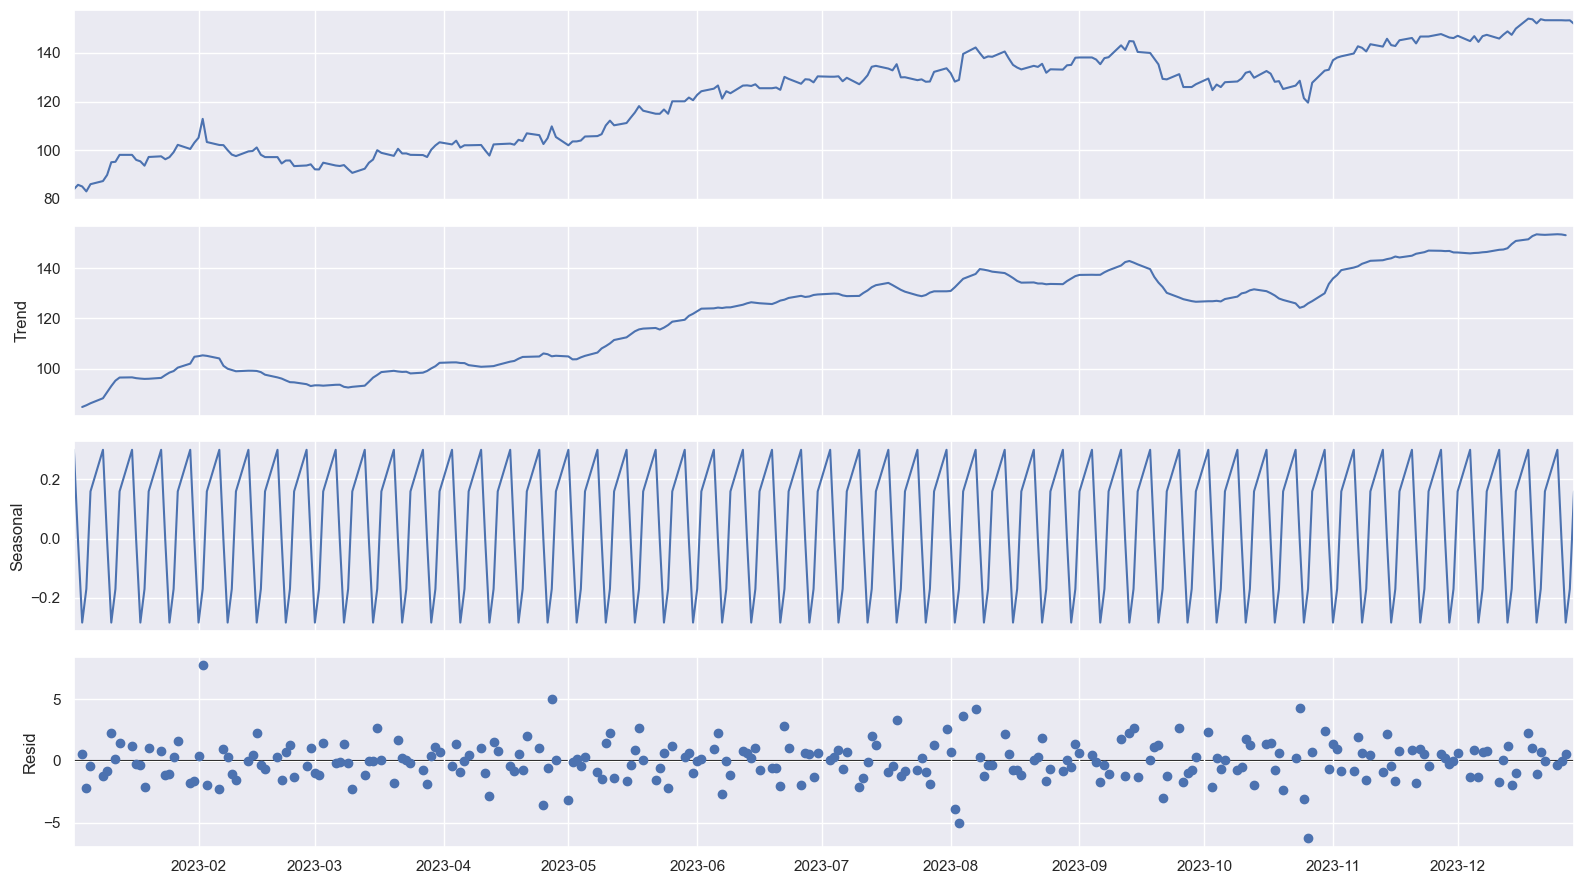

In [42]:
s_dec_additive = seasonal_decompose(df[["close"]].loc["2023"], model = "additive")
fig = s_dec_additive.plot();
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

## Caminata aleatoria

In [45]:
steps = np.random.normal(loc=0, scale=1, size=len(df[["close"]].loc["2023"]))

In [47]:
steps.shape

(260,)

In [49]:
P = 100 + np.cumsum(steps)

In [51]:
P = pd.DataFrame(P)

In [53]:
P.index =df[["close"]].loc["2023"].index

In [55]:
P.columns = ["Caminata Aleatoria"]

In [57]:
P

,Caminata Aleatoria
time,
2023-01-02,99.743785
2023-01-03,99.895311
2023-01-04,100.163664
2023-01-05,98.559287
2023-01-06,97.276740
...,...
2023-12-25,84.545170
2023-12-26,84.602532
2023-12-27,85.080436


<Axes: xlabel='time'>

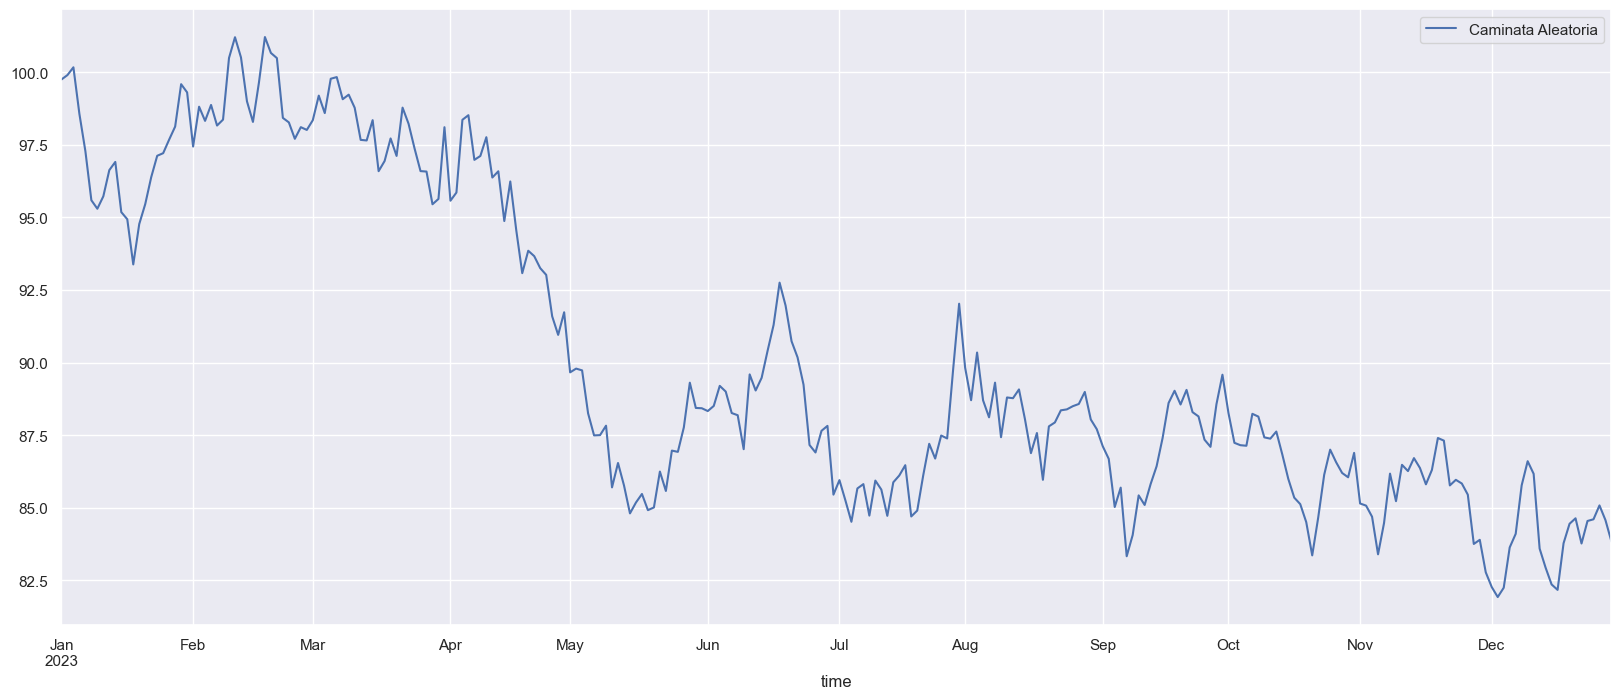

In [59]:
P.plot(figsize=(20,8))

In [74]:
P["Serie"] = df[["close"]].loc["2023"]

In [76]:
P["Ruido Blanco"] = steps

In [78]:
P.head()

,Caminata Aleatoria,Serie,Ruido Blanco
time,,,
2023-01-02,99.743785,84.000000,-0.256215
2023-01-03,99.895311,85.820000,0.151526
2023-01-04,100.163664,85.139999,0.268353
2023-01-05,98.559287,83.120003,-1.604377
2023-01-06,97.276740,86.080002,-1.282547


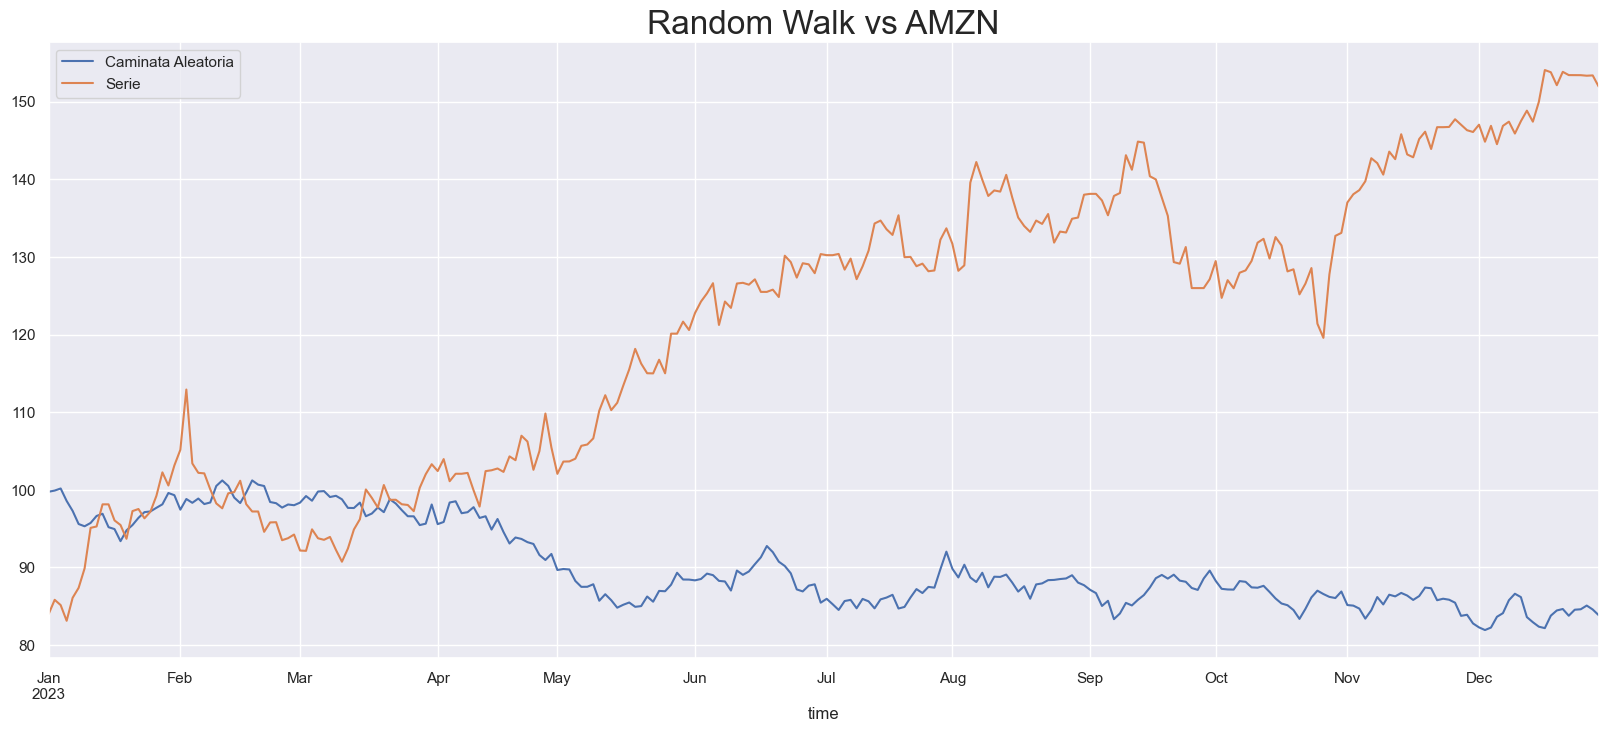

In [80]:
P["Caminata Aleatoria"].plot(figsize = (20,8))
P["Serie"].plot()
plt.title("Random Walk vs AMZN", size = 24)
plt.legend() 
plt.show()

## Función de autocorrelación ACF

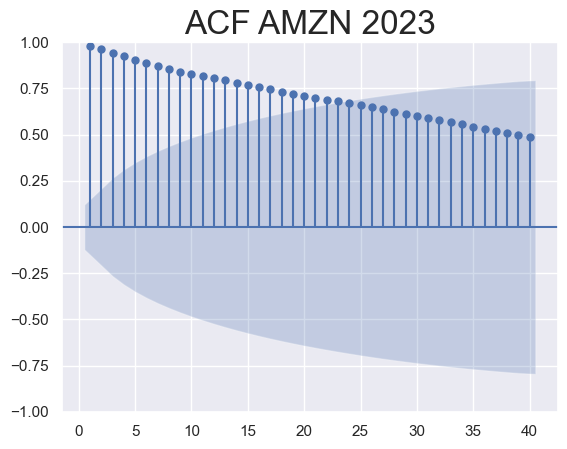

In [83]:
sgt.plot_acf(P["Serie"], lags = 40, zero = False)
plt.title("ACF AMZN 2023", size = 24)
plt.show()

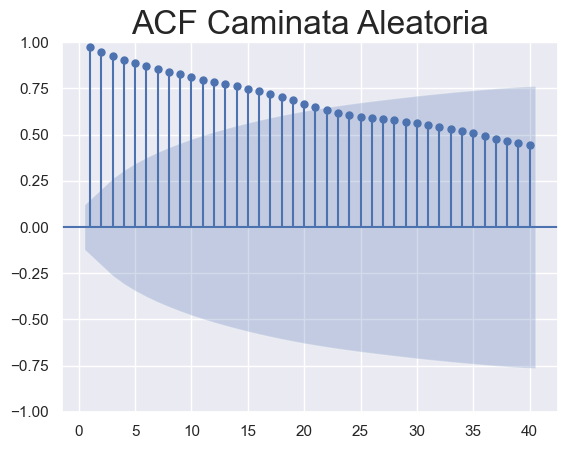

In [85]:
sgt.plot_acf(P["Caminata Aleatoria"], lags = 40, zero = False)
plt.title("ACF Caminata Aleatoria", size = 24)
plt.show()

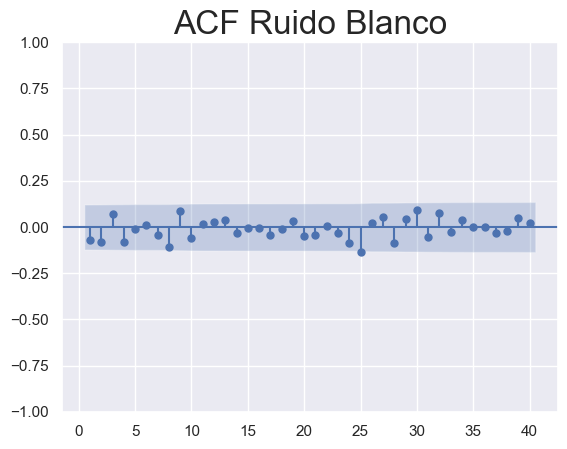

In [89]:
sgt.plot_acf(P["Ruido Blanco"], lags = 40, zero = False)
plt.title("ACF Ruido Blanco", size = 24)
plt.show()

## Función de autocorrelación parcial PACF

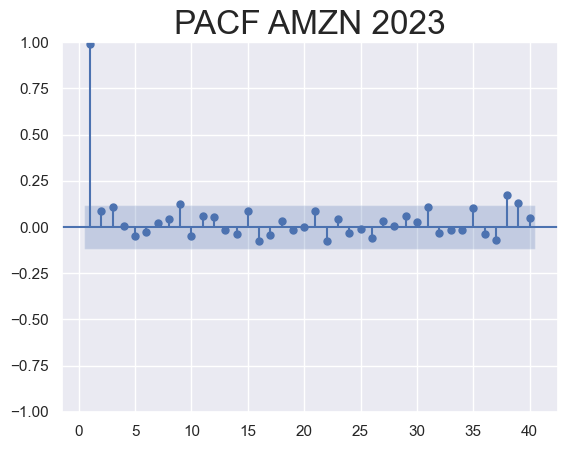

In [92]:
sgt.plot_pacf(P["Serie"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF AMZN 2023", size = 24)
plt.show()

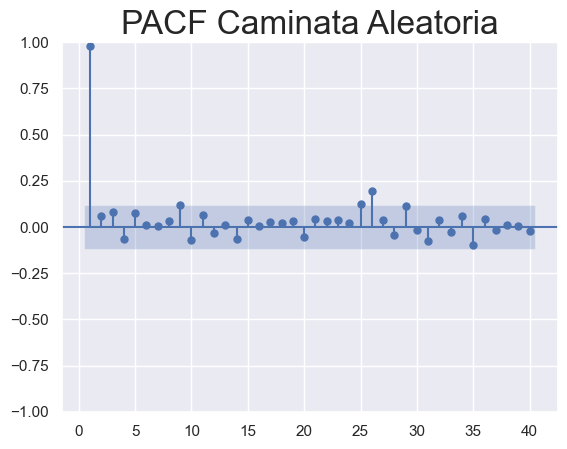

In [94]:
sgt.plot_pacf(P["Caminata Aleatoria"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Caminata Aleatoria", size = 24)
plt.show()

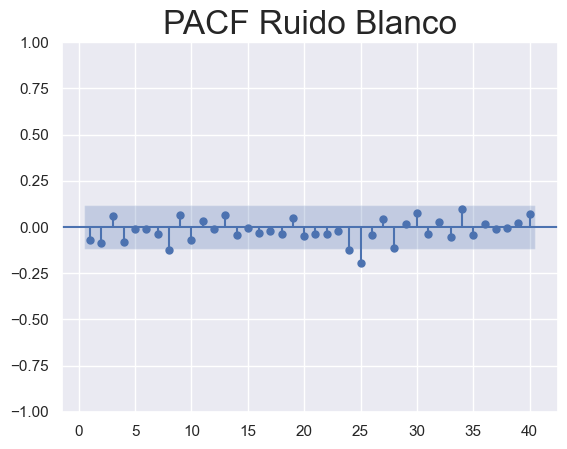

In [96]:
sgt.plot_pacf(P["Ruido Blanco"], lags = 40, zero = False, method = ('ols'))
plt.title("PACF Ruido Blanco", size = 24)
plt.show()